In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

# Cleaning and Fixing

## Filling N/A Values 

### Filling Integer Values

<Axes: >

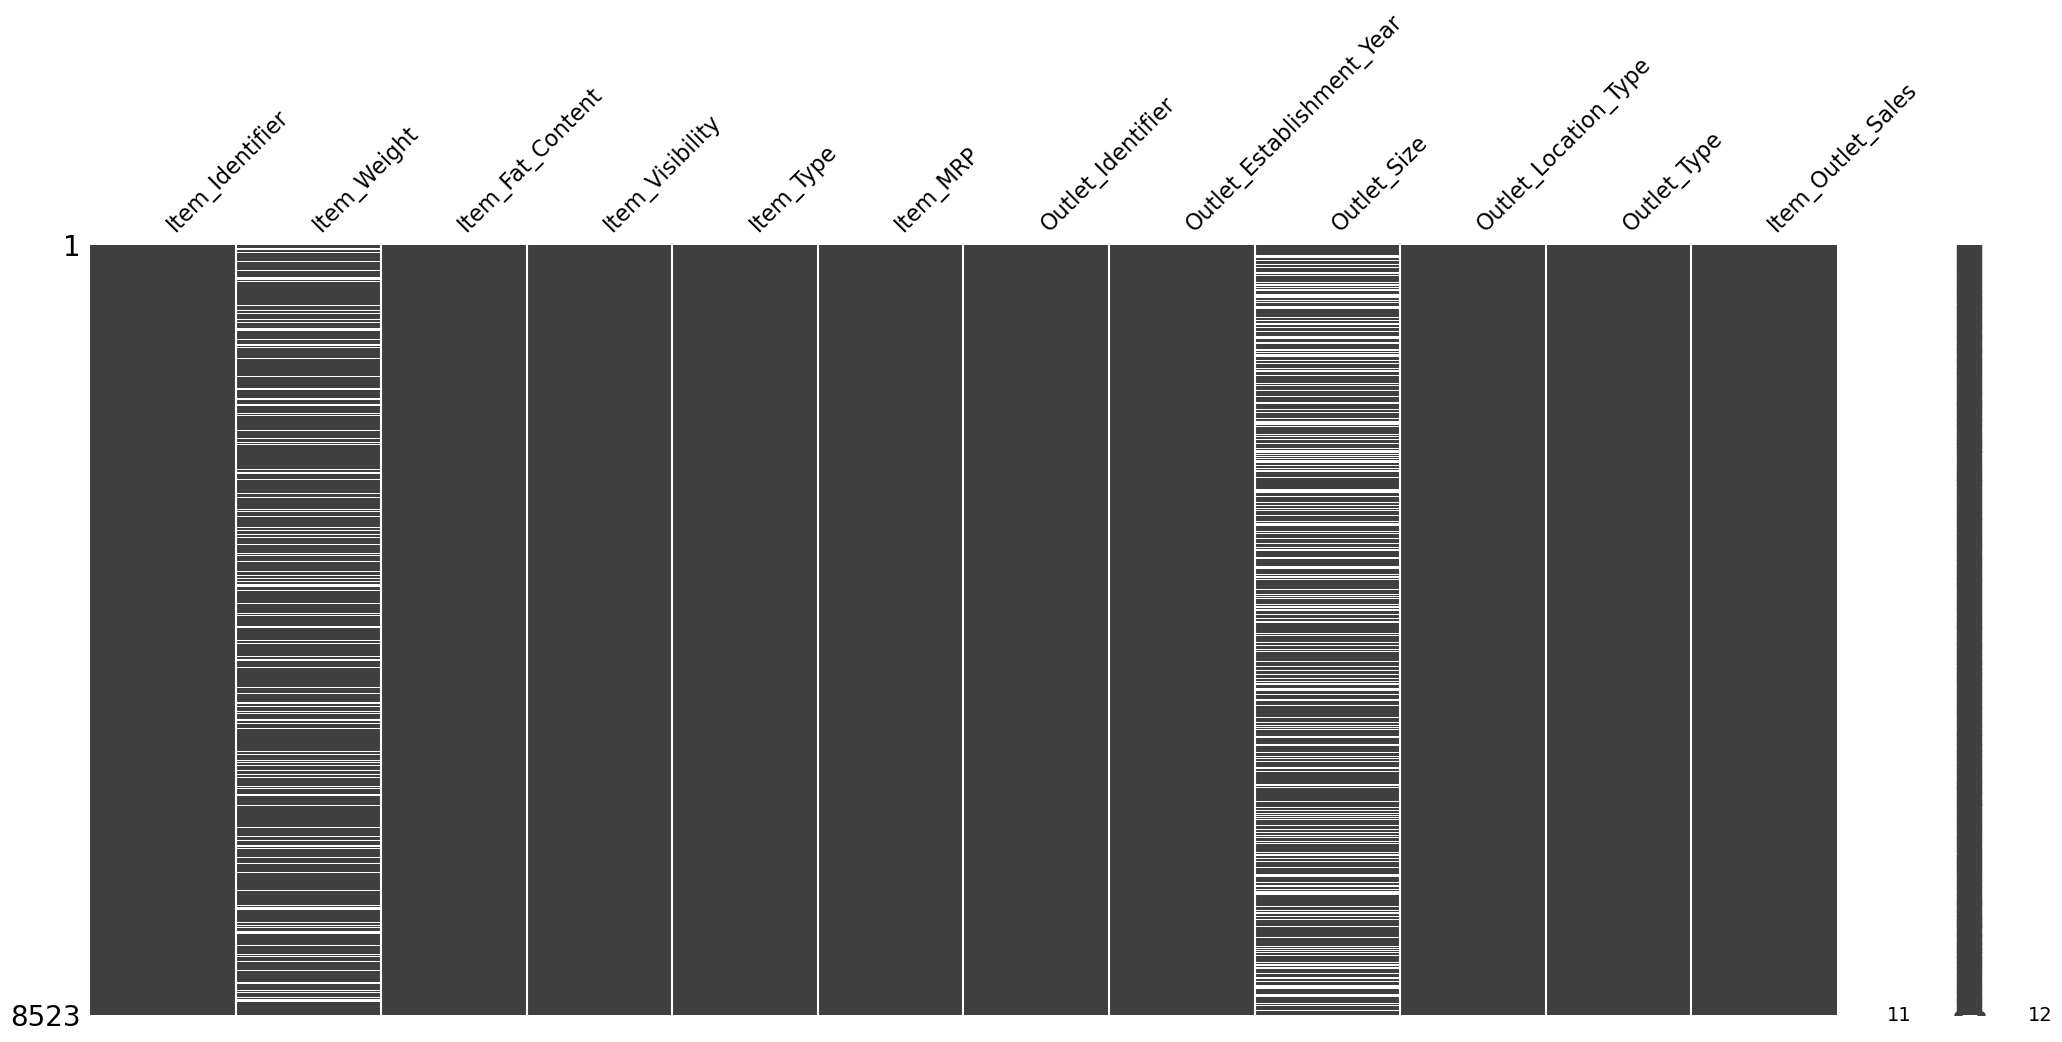

In [9]:
import missingno as ms
ms.matrix(df)

In [10]:
df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [11]:
median_value=df["Item_Weight"].median()
median_value

12.6

We can fill the missing values with median or mean both has the power for represent the data.

I'm gonna use median.

In [12]:
df["Item_Weight"].fillna(median_value, inplace=True)
df["Item_Weight"].isna().sum()

0

### Filling the Categorical Value Using KNN 

In [13]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
df['Outlet_Size'] = df['Outlet_Size'].replace("nan", np.nan)
le = LabelEncoder()
df_non_null = df.dropna()  
df['Outlet_Size_encoded'] = df['Outlet_Size']

In [14]:
df.loc[df_non_null.index, 'Outlet_Size_encoded'] = le.fit_transform(df_non_null['Outlet_Size'])
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")  
df[['Outlet_Size_encoded']] = knn_imputer.fit_transform(df[['Outlet_Size_encoded']])  
df['Outlet_Size'] = le.inverse_transform(df['Outlet_Size_encoded'].astype(int))
df.drop(columns=['Outlet_Size_encoded'], inplace=True)

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [23]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


**I've delete the columns that includes "Identifier" with del function**

## Changing objects to numeric values

In [24]:
str_data=df.select_dtypes(include=["object"])
int_data=df.select_dtypes(include=["integer","float"])

### features=str_data.apply(le.fit_transform)
features=features.join(int_data)
last_df=features
last_df.head()

# Exploratory Analysis

## Total Sales Due To Locations

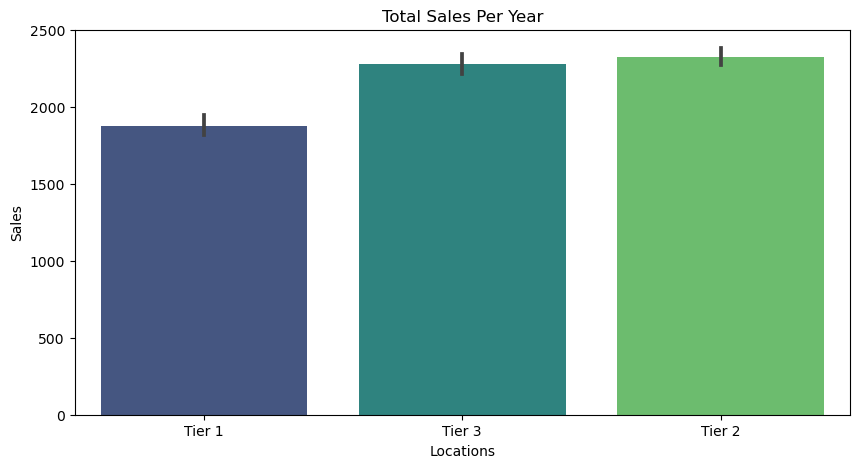

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df, palette="viridis")

plt.title("Total Sales Per Year")
plt.xlabel("Locations")
plt.ylabel("Sales")
plt.show()

## Sales Trend by Years

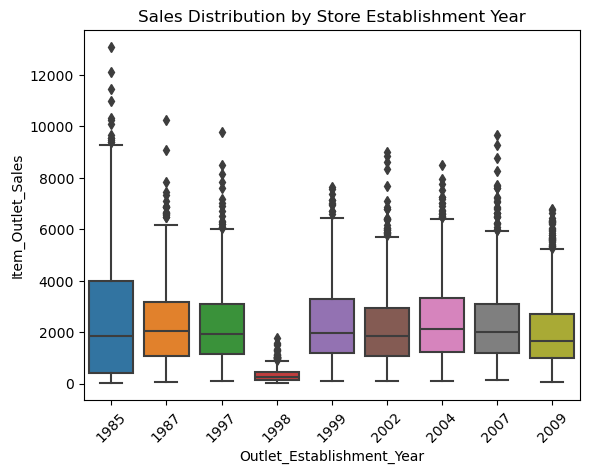

In [39]:
sns.boxplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=df)
plt.title("Sales Distribution by Store Establishment Year")
plt.xticks(rotation=45)
plt.show()

**Stores established in 1985 tend to have higher sales, with some performing exceptionally well. This suggests that these stores are more established, have a strong customer base, or are in prime locations.**

**Stores from 1998 show significantly lower performance. It would be useful to investigate why these stores are underperforming.**

Stores from other years have relatively stable and similar sales. 

## How Does Product MRP and Visibility Affect Sales?

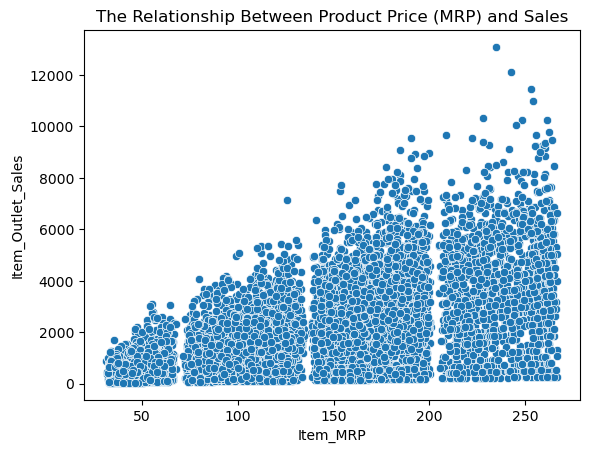

In [40]:
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data=df)
plt.title("The Relationship Between Product Price (MRP) and Sales")
plt.show()

**This graph indicates a positive correlation between product price (MRP) and sales, with distinct pricing segments affecting sales trends. However, other factors like product type, promotions, and outlet location might also be influencing these patterns.**

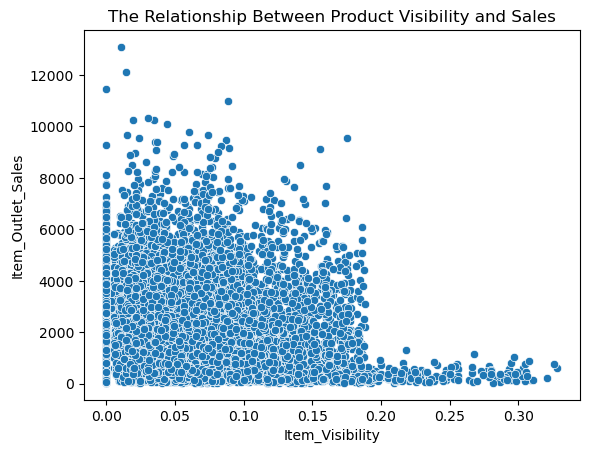

In [42]:
sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", data=df)
plt.title("The Relationship Between Product Visibility and Sales")
plt.show()

**Unlike price (MRP), product visibility does not strongly influence sales in this dataset. Some low-visibility products perform very well, while some highly visible ones struggle. This suggests that other factors such as brand strength, promotions, and pricing have a bigger impact on sales than shelf visibility alone.**

C:\Users\USER\AppData\Local\Temp\ipykernel_7480\2770870764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(last_df["Item_Outlet_Sales"])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

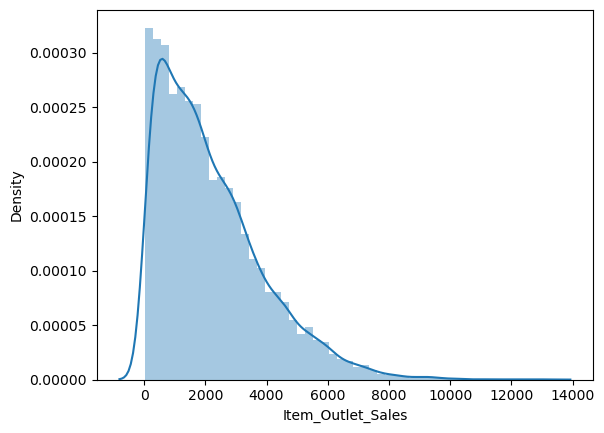

In [48]:
sns.distplot(last_df["Item_Outlet_Sales"])

C:\Users\USER\AppData\Local\Temp\ipykernel_7480\3248810201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(last_df["Item_MRP"])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_MRP', ylabel='Density'>

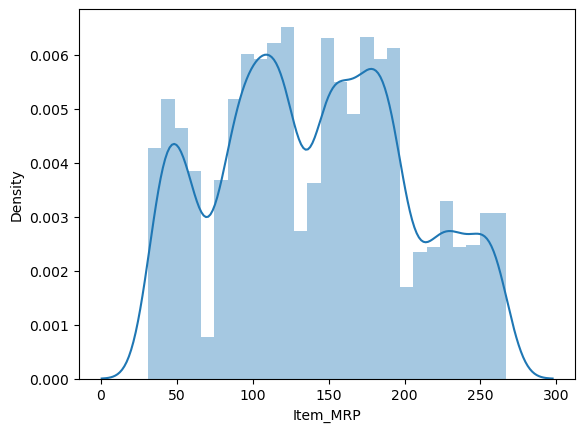

In [47]:
sns.distplot(last_df["Item_MRP"])

## Corelattion Matrix

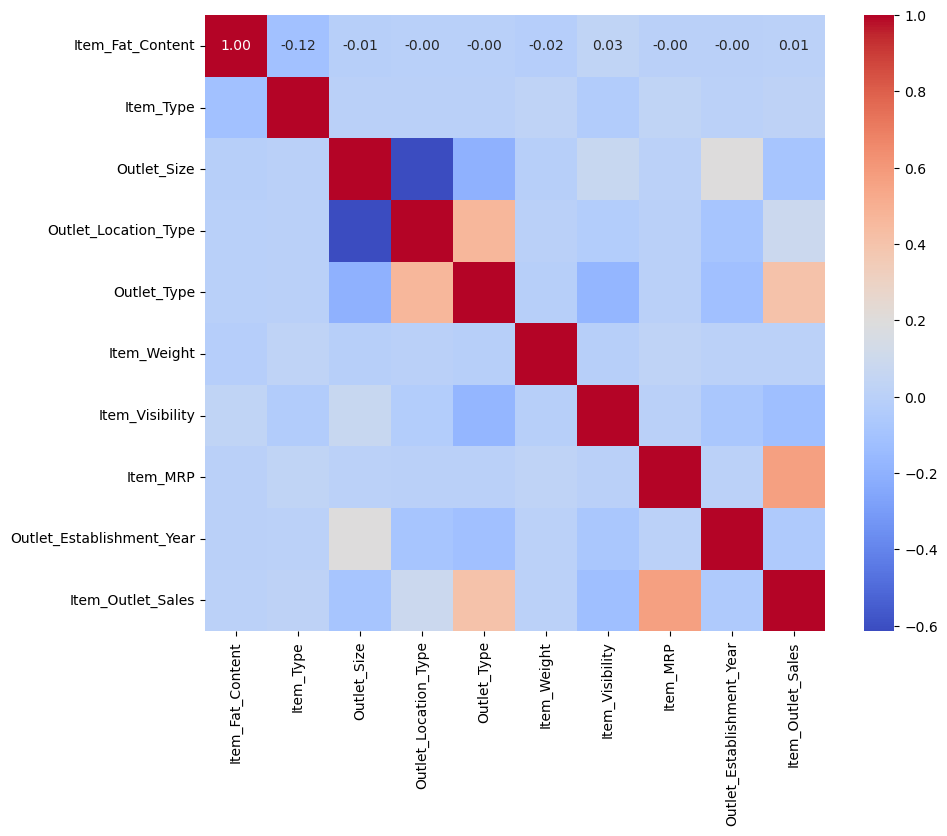

In [52]:
corr=last_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.show()

In [53]:
print(last_df.nunique())

Item_Fat_Content                5
Item_Type                      16
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Weight                   415
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64


# Creating Model

In [56]:
X=last_df.drop(columns=["Item_Outlet_Sales", "Outlet_Establishment_Year"])
y=last_df["Item_Outlet_Sales"]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(model, X,y):
    model.fit(X,y)

    pred=model.predict(X)

    cv_score=cross_val_score(model, X,y, scoring="neg_mean_squared_error", cv=5)
    cv_score=np.abs(np.mean(cv_score))

    print("Model Report")
    print("CV Score", cv_score)

Model Report
CV Score 1472954.2118952305


<Axes: title={'center': 'Model Coefficients'}>

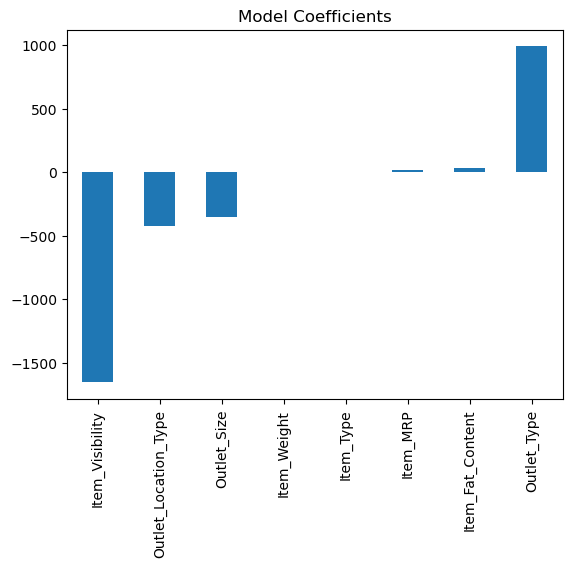

In [62]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model=LinearRegression()
train(model, X_train, y_train)
coef=pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind="bar", title="Model Coefficients")